<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Restaurant revenue data analysis</div>

 

Ресторанная индустрия и сфера гостеприимства развивается и крепнет с каждым днем.
Модернизация рабчих процессов также неизбежна:
за последние 3 года количество продуктов программного обеспечения для ресторанов и кафе выросло на 137%.
Ежегодно количество организаций общественного питания растет приблизительно на 6тыс. компаний в год.

Програмное обеспечение ресторанов собирает и хранит огромное количество данных, но только в том случае, если сотрудники корректно вносят их в программу.

Основываясь на собранных данных можно увеличить потенциальную выручку и работоспособность, а главное - сократить издержки.

Я запросил данные о кассовых сменах бара в котором работал, чтобы проанализировать:
- влияющие на размер выручки факторы; 
- динамику выручки с учетом подъема цен; 
- эффективность распределения рабочей силы;
- и найти новые инсайты; 
- вытекающие выводы.      

![jupyter](data/755928949871139.jpeg)

### Данные:

- Учет.день  - дата рабочей смены
- №кассы - Номер оборудования
- №смены - порядковый номер смены
- Касса - группа оборудования
- Открыта - дата и время открытия кассовой смены
- Закрыта - дата и время закрытия кассовой смены
- Отв. кассир - имя кассира
- Менеджер - имя менеджера
- Нач.остаток - остаток наличных в кассе на момент открытия кассовой смены
- Суммапродаж - общая выручка полученная за рабочую смену
- Списания - возвраты денежных средств безналичными
- Внесения - внесенные наличные в кассу
- Изъятия - изъятые наличные
- Выручка - полученные наличные по продажам
- Конечныйостаток - остаток наличных в кассе на момент закрытия кассовой смены
- Разница
- Состояние - статус кассовой смены (Открыта/Закрыта)

In [3]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import re
import datetime as dt
from scipy.stats import shapiro


import camelot      #работа с pdf файлами
from os import walk

# визуализация

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 7)})
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.3)

%matplotlib inline

In [4]:
# Функция сбора информации с pdf файлов

def weather(files):
    data = pd.DataFrame()
    for file in files:
        table = camelot.read_pdf(f'data/wether-diary/{file}')
        df = table[0].df
        df.drop(columns=range(3, 11), index=[0,1], inplace=True)
        df.columns = ['day', 'temp', 'press']
        df['month'] = file[:-4]
        data = pd.concat([data, df], ignore_index=True)
    return data
    

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Data</div>


### Restaurant's data

In [5]:
data_22 = pd.read_excel('data/Кассовые смены_1.xlsx', convert_float=True)
data_21 = pd.read_excel('data/Кассовые смены 21 (1).xlsx', convert_float=True)
data_22.head()

,Учет.день,№кассы,№смены,Касса,Открыта,Закрыта,Отв. кассир,Менеджер,Нач.остаток,Суммапродаж,Списания,Внесения,Изъятия,Выручка,Конечныйостаток,Разница,Состояние,Фискаль-ный номер,Unnamed: 18
0,18.11.2022,55,550,Основная группа,18.11.2022 15:50,NaN,NaN,Пирс <3 617343,"0,00",0,"0,00","1 950,01",0,0,"0,00","0,00",Открыта,0,NaN
1,17.11.2022,55,549,Основная группа,17.11.2022 16:34,18.11.2022 1:04,Пирс <3 617343,Руслан 617343,"0,00",58823.9,"2 700,00","2 034,01",16407.9,1950.01,"0,00","-1 950,01",Не принята,0,NaN
2,14.11.2022,1,548,Основная группа,14.11.2022 15:39,15.11.2022 0:32,Руслан 617343,Руслан 617343,"0,00",28564,"0,00","0,01",5010,2034.01,"0,00","-2 034,01",Не принята,48,NaN
3,13.11.2022,1,547,Основная группа,13.11.2022 15:28,14.11.2022 0:46,Пирс <3 617343,Пирс <3 617343,"0,00",43302.5,"0,00","0,01",0,0.01,"0,00","-0,01",Не принята,0,NaN
4,12.11.2022,1,546,Основная группа,12.11.2022 15:44,13.11.2022 4:46,Пирс <3 617343,Руслан 617343,"0,00",334624,"0,00","13 098,67",26668.7,0,"0,00","0,00",Не принята,46,NaN


In [6]:
data_21.head()

,Учет.день,№кассы,№смены,Касса,Открыта,Закрыта,Отв. кассир,Менеджер,Нач.остаток,Суммапродаж,Списания,Внесения,Изъятия,Выручка,Конечныйостаток,Разница,Состояние,Фискаль-ный номер,Unnamed: 18
0,2021-12-31 00:00:00,1,238,Основная группа,2021-12-31 21:42:00,2022-01-01 06:52:00,Игорь Антонов 617359,Сеня 617354,"0,00",91213.5,"113 120,00","10 621,09",24224.7,8886.35,"0,00","-8 886,35",Не принята,169,NaN
1,2021-12-30 00:00:00,1,237,Основная группа,2021-12-30 15:57:00,2021-12-30 23:06:00,Руслан 617343,Елена 617352,"0,00",107329,"0,00","15 624,11",13272.6,5337.09,"0,00","-5 337,09",Не принята,168,NaN
2,2021-12-29 00:00:00,1,236,Основная группа,2021-12-29 14:26:00,2021-12-29 22:58:00,Руслан 617343,Елена 617352,"0,00",92127,"0,00","25 599,11",15895,15624.1,"0,00","-15 624,11",Не принята,167,NaN
3,2021-12-28 00:00:00,1,235,Основная группа,2021-12-28 15:30:00,2021-12-28 23:03:00,Дима 617342,Игорь Виноградов 617359,"0,00",71444.5,"0,00","5 385,11",33017,2081.11,"0,00","-2 081,11",Не принята,166,NaN
4,2021-12-27 00:00:00,1,234,Основная группа,2021-12-27 17:56:00,2021-12-27 22:59:00,Вика 617356,Сеня 617354,"0,00",3720,"0,00","9 101,11",5183,3918.11,"0,00","-3 918,11",Не принята,165,NaN


In [7]:
data_21.shape, data_22.shape

((309, 19), (392, 19))

### Dollar exchange rate data

In [8]:
dollar = pd.read_excel('data/dollar.xlsx')
dollar = dollar[['data', 'curs']]
dollar.head()

,data,curs
0,2022-12-13,62.7674
1,2022-12-10,62.3813
2,2022-12-09,62.5722
3,2022-12-08,62.9372
4,2022-12-07,62.9103


In [9]:
dollar.shape

(481, 2)

### Weather data

Данные о погодных условиях за последние 2 года хранятся в PDF файлах на каждый месяц раздельно.
Напишу функцию по сбору данных и преобразованию к единому датасету с PDF файлов.

In [10]:
data_weather = weather(next(walk('data/wether-diary'), (None, None, []))[2][1:])
data_weather.head()

,day,temp,press,month
0,1,-5,755,1-2022
1,2,-7,759,1-2022
2,3,-6,748,1-2022
3,4,-4,745,1-2022
4,5,+2,740,1-2022


In [11]:
data_weather.shape

(631, 4)

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Data cleaning</div>

Получено двe xlsx таблицы за 2021 и 2022 год.
Данные выгружены некорректно: повторяющиеся заголовки и разница в форматах даты. Подготовим их к слиянию.



Так как отчетность регистрировалась в программе некорректно, большинство признаков не несут никакой информации.

Будем считать их неинформативными и избавимся от них.

#### Основную ценность несут в себе признаки:
- содержащие даты, 
- сумма продаж (Общая выручка за смену),
- выручка (Наличные полученные за смену).

In [12]:
# Лишние заголовки
rows_to_drop = data_21[data_21['Учет.день'] == 'Учет.день']
rows_to_drop_2 = data_22[data_22['Учет.день'] == 'Учет.день']

data_21.drop(rows_to_drop.index, axis=0, inplace=True)
data_22.drop(rows_to_drop_2.index, axis=0, inplace=True)

In [13]:
# Приведем к типу  datetime

data_21['date'] = pd.to_datetime(data_21['Учет.день'], format='%d.%m.%Y' )
data_22['date'] = pd.to_datetime(data_22['Учет.день'], format='%d.%m.%Y' )


In [14]:
# Объединим данные

df = pd.concat([data_21, data_22], axis=0, ignore_index=True)
df.shape

(676, 20)

In [15]:
df.drop(labels=['№кассы',
                '№смены',
                'Касса',
                'Отв. кассир',
                'Менеджер',
                'Фискаль-ный номер',
                'Состояние',
                'Списания',
                'Открыта',
                'Закрыта',
                'Внесения',
                'Конечныйостаток',
                'Нач.остаток',
                'Разница',
                'Состояние',
                'Unnamed: 18',
               'Изъятия'], axis=1, inplace=True) 

Предположительно, смены закрывались неккоректно - об этом свидетельствуют повторяющиеся даты. Возможно, в некоторые дни открывалось две рабочих смены в системе. Этот шум можно исправить в данных с помощью группировки.

Так как мы будем считать повторы за один день, кроме даты - оставшиеся показатели суммируются.

In [16]:
df['date'].value_counts().sort_values(ascending=False).head(10)

2022-05-23    2
2022-06-24    2
2022-02-21    2
2022-10-11    2
2022-02-11    2
2022-02-19    2
2021-09-17    2
2022-05-05    2
2021-04-06    2
2022-02-12    2
Name: date, dtype: int64

In [17]:
df = df.loc[df['Суммапродаж'] != 0.0]

In [18]:
df = df.groupby(['date']).agg('sum').reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         548 non-null    datetime64[ns]
 1   Суммапродаж  548 non-null    float64       
 2   Выручка      548 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.0 KB


Преобразую дату в данных о погоде к типу datetime

#### Я запросил действующий график сотрудников:

- Понедельник и Вторник: в смене 3 человека
- Среда и Четверг: в смене 4 человека
- Пятница и Суббота: в смене 6 человек
- Воскресенье: в смене 3 человека






In [19]:
data_weather['date'] =data_weather['day']+ '-' + data_weather['month'].astype(str)
data_weather['date'] = pd.to_datetime(data_weather['date'])

data_weather.drop(columns=['day', 'month'], inplace=True)

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Feautures generation</div>

### Так как признаков в данных немного, я сгенерирую несколько дополнительных и  легитимных по отношению к выручке бара


- 'workers' - Количество сотрудников задействованных в рабочей смене.
- 'temp' - Температура воздуха в Центральном районе Санкт-Петербурга в цельсиях.
- 'curs' - Курс доллара по отношению к рублю.
- 'press' - Атмосферное давление.
- 'weekend' - Является ли день выходным (0 - Будний; 1 - Выходной)
- 'revenue_new' - Выручка бара с учетом повышенных цен.

In [20]:
# Weekday, month, year

df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Weekend

day = [df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday']),
       df['weekday'].isin(['Friday', 'Saturday'])]
weekend = [0, 1]


df['weekend'] = np.select(day, weekend, default='Not satisfied')

#Workers

weekday = [df['weekday'].isin(['Monday', 'Tuesday']),
       df['weekday'].isin(['Wednesday', 'Thursday']),
       df['weekday'].isin(['Friday', 'Saturday']),
       df['weekday'] == 'Sunday']
team = [3, 4, 6, 3]


df['workers'] = np.select(weekday, team, default='Not satisfied')

# New price

Также мне сообщили, что происходили повышения цен:
- 30 июля 2021 на 15%
- 15  апреля 2022 на 15%

Добавлю признак revenue_new отражающий выручку с учетом поднятия цен и исследую его.

In [21]:
# Функция вычисления выручки с учетом поднятых цен 

def new_prices(row):
    
    # Все цены до первого поднтия цен будут увеличены на 15% дважды
    if row['date'] < pd.to_datetime('2021-07-30'):
        val = row['Суммапродаж'] * 1.15 * 1.15
    
    # Все цены до  второго поднтия цен и после первого будут увеличены на 15% 
    elif (row['date'] < pd.to_datetime('2022-04-15')) and (row['date'] > pd.to_datetime('2021-07-30')):
        val = row['Суммапродаж'] * 1.15
        
    else:
        val = row['Суммапродаж']
        
    return val

In [22]:
df['revenue_new'] = df.apply(new_prices, axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         548 non-null    datetime64[ns]
 1   Суммапродаж  548 non-null    float64       
 2   Выручка      548 non-null    float64       
 3   weekday      548 non-null    object        
 4   month        548 non-null    int64         
 5   year         548 non-null    int64         
 6   weekend      548 non-null    object        
 7   workers      548 non-null    object        
 8   revenue_new  548 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 38.7+ KB


In [24]:
# Press and Temp

df = pd.merge_asof(df.sort_values(by='date'),\
                   data_weather.sort_values(by='date'), on='date', direction='nearest')

In [25]:
# Curs

df = pd.merge_asof(df.sort_values(by='date'),\
                   dollar.sort_values(by='data'),\
                   left_on='date', right_on='data', direction='nearest')

In [26]:
num = ['Суммапродаж', 'Выручка', 'temp', 'press', 'workers']

for i in num:
    df[i] = pd.to_numeric(df[i])

In [27]:
df.drop(columns='data', inplace=True)
df.dropna(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         547 non-null    datetime64[ns]
 1   Суммапродаж  547 non-null    float64       
 2   Выручка      547 non-null    float64       
 3   weekday      547 non-null    object        
 4   month        547 non-null    int64         
 5   year         547 non-null    int64         
 6   weekend      547 non-null    object        
 7   workers      547 non-null    int64         
 8   revenue_new  547 non-null    float64       
 9   temp         547 non-null    float64       
 10  press        547 non-null    float64       
 11  curs         547 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 55.6+ KB


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Exploratory data analysis</div>

 

Теперь, когда данные приведены к корректным типам и наполнены валидной информацией, перейдем к анализу переменных.

In [29]:
# Посмотрим на общую статистику 

df.describe().round(2)

,Суммапродаж,Выручка,month,year,workers,revenue_new,temp,press,curs
count,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00
mean,113381.33,12045.11,6.85,2021.56,4.18,125927.42,11.23,759.33,71.05
std,99949.12,11803.12,3.08,0.50,1.25,106284.02,10.28,8.45,11.00
min,2609.50,0.00,1.00,2021.00,3.00,3000.92,-15.00,728.00,51.16
25%,43525.50,4057.10,5.00,2021.00,3.00,48159.10,4.00,755.00,61.37
50%,76152.00,8354.36,7.00,2022.00,4.00,83828.50,11.00,760.00,72.92
75%,164593.25,16546.71,9.00,2022.00,6.00,189609.31,19.00,764.00,74.63
max,464169.00,84229.30,12.00,2022.00,6.00,464169.00,36.00,785.00,120.38


# Revenue and cash

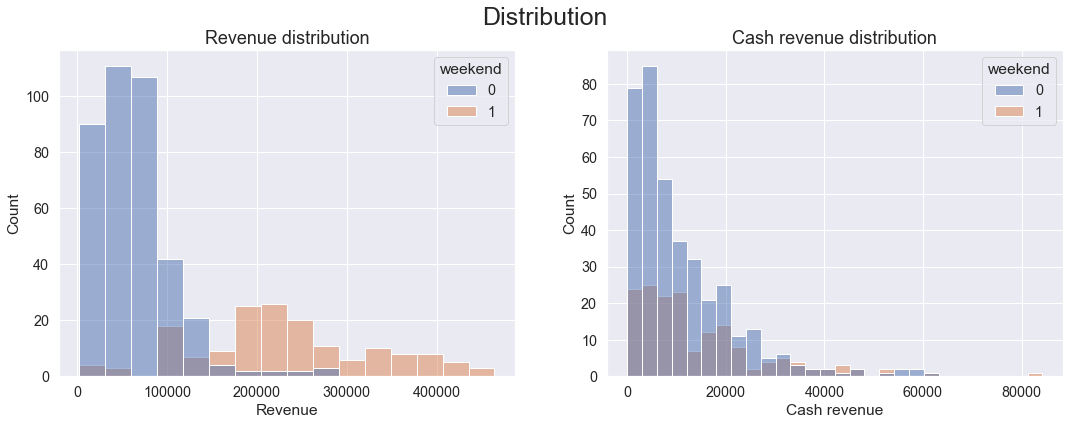

In [30]:
f, ax = plt.subplots(1, 2, figsize=(18,6))

f.suptitle('Distribution', size=25)

sns.histplot(x='Суммапродаж', data=df, hue='weekend', ax=ax[0])
sns.histplot(x='Выручка', data=df, hue='weekend', ax=ax[1])



ax[0].set_xlabel('Revenue')
ax[0].set_title('Revenue distribution', size=18)

ax[1].set_xlabel('Cash revenue')
ax[1].set_title('Cash revenue distribution', size=18)
            
            
plt.show()


Распределение выручки выглядит как логнормальное, что ожидаемо при анализе доходов.

Ожидаемая для бара тенденция - выручка достигает наибольших объемов по выходным.

На графике видно, что выручки растут к выходным, но количество получаемых наличных остается приблизительно одинаковым.


In [31]:
cash = df.groupby(['weekend'])['Выручка'].agg('median').reset_index()
revenue = df.groupby(['weekend'])['Суммапродаж'].agg('median').reset_index()

cash_grow = cash['Выручка'][1]/cash['Выручка'][0]*100 - 100
revenue_grow = revenue['Суммапродаж'][1]/revenue['Суммапродаж'][0]*100 - 100



print(f'Средняя выручка растет на выходных приблизительно на {round(revenue_grow)}% \nВ то время как количество наличных только на {round(cash_grow)}%')


Средняя выручка растет на выходных приблизительно на 282% 
В то время как количество наличных только на 45%


# Year

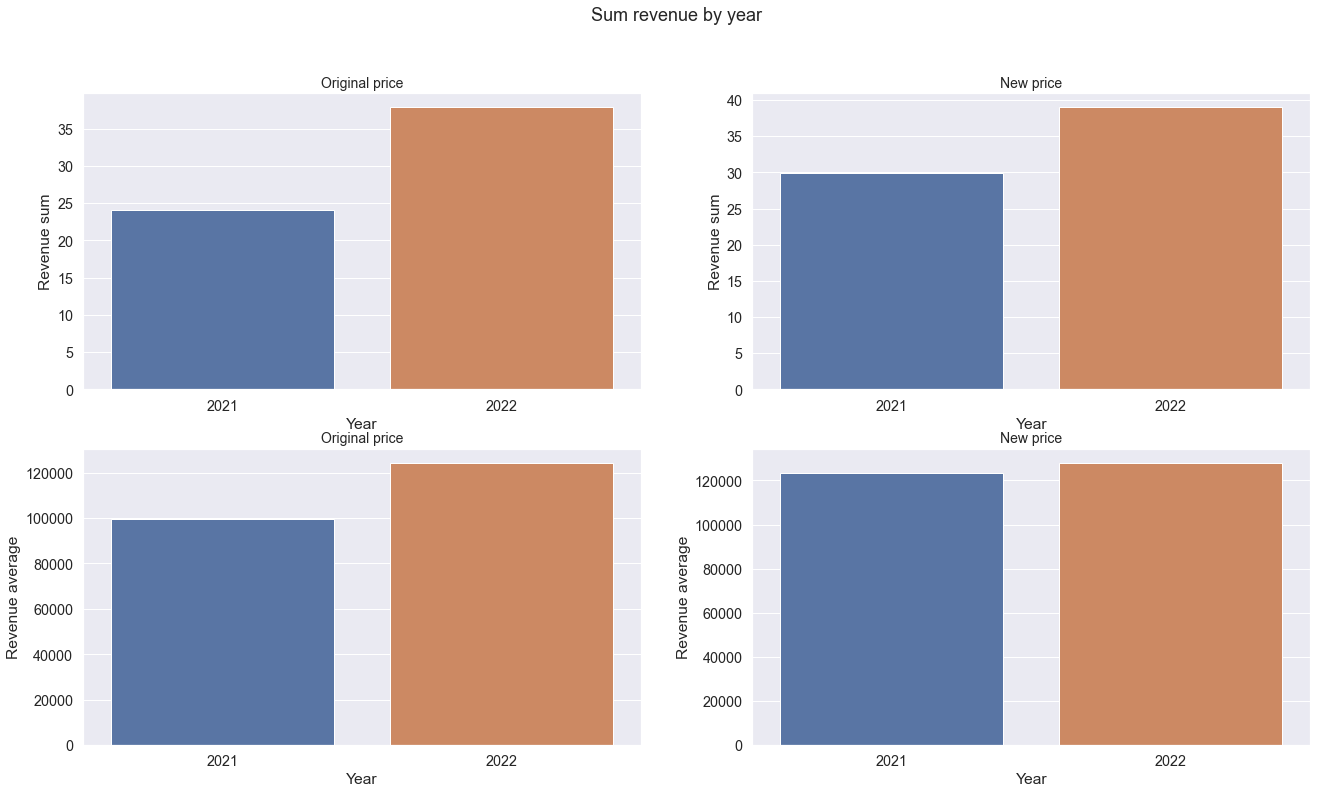

Revenue sum increased with old prices - 57%
Revenue sum increased with new prices - 31%

Revenue in average increased with old prices - 25%
Revenue in average increased with new prices - 4%



In [32]:
year_rev = df.groupby('year').agg({'Суммапродаж':'sum'}).sort_index().reset_index()
year_rev_new = df.groupby('year').agg({'revenue_new':'sum'}).sort_index().reset_index()

year_rev_avg = df.groupby('year').agg({'Суммапродаж':'mean'}).sort_index().reset_index()
year_rev_avg_new = df.groupby('year').agg({'revenue_new':'mean'}).sort_index().reset_index()

year_rev['Суммапродаж'] = year_rev['Суммапродаж'] / 1000000
year_rev_new['revenue_new'] = year_rev_new['revenue_new'] / 1000000


rev_new_sum = year_rev_new['revenue_new'][1]/year_rev_new['revenue_new'][0]*100 - 100
rev_sum = year_rev['Суммапродаж'][1]/year_rev['Суммапродаж'][0]*100 - 100

rev_avg_new = year_rev_avg_new['revenue_new'][1]/year_rev_avg_new['revenue_new'][0]*100 - 100
rev_avg = year_rev_avg['Суммапродаж'][1]/year_rev_avg['Суммапродаж'][0]*100 - 100


f, ax = plt.subplots(2, 2, figsize=(22,12))

f.suptitle('Sum revenue by year', size=18)

sns.barplot(x='year', y='Суммапродаж', data=year_rev, ax=ax[0][0])
sns.barplot(x='year', y='revenue_new', data=year_rev_new, ax=ax[0][1])


sns.barplot(x='year', y='Суммапродаж', data=year_rev_avg, ax=ax[1][0])
sns.barplot(x='year', y='revenue_new', data=year_rev_avg_new, ax=ax[1][1])


ax[0][0].set_xlabel('Year')
ax[0][0].set_ylabel('Revenue sum')
ax[0][0].set_title('Original price', size=14)

ax[0][1].set_xlabel('Year')
ax[0][1].set_ylabel('Revenue sum')
ax[0][1].set_title('New price', size=14)


ax[1][0].set_xlabel('Year')
ax[1][0].set_ylabel('Revenue average')
ax[1][0].set_title('Original price', size=14)

ax[1][1].set_xlabel('Year')
ax[1][1].set_ylabel('Revenue average')
ax[1][1].set_title('New price', size=14)

            
            
plt.show()

print(f'Revenue sum increased with old prices - {round(rev_sum)}%\nRevenue sum increased with new prices - {round(rev_new_sum)}%\n')
print(f'Revenue in average increased with old prices - {round(rev_avg)}%\nRevenue in average increased with new prices - {round(rev_avg_new)}%\n')



В 2022 году общая выручка выросла на 57% в сравнении с предыдущим годом.
С учетом изменения цен, выручка выросла на 30% с предыдущего года, положительная тенденция также наблюдается.

В среднем, дневные выручки за год увеличилась на 26%, но с учетом поднятия цен можно сказать, что средняя выручка за день увеличилась только на 5%.

Первоначально, можно сделать выводы об успешной деятельности компании в сравнении с предыдущим годом. Попробуем углубиться в данные.

# Month & Weekday

Посмотрим на распределение выручки по дням недели, месяцам и сравним 2022 и 2021 год на наличие тенденций.

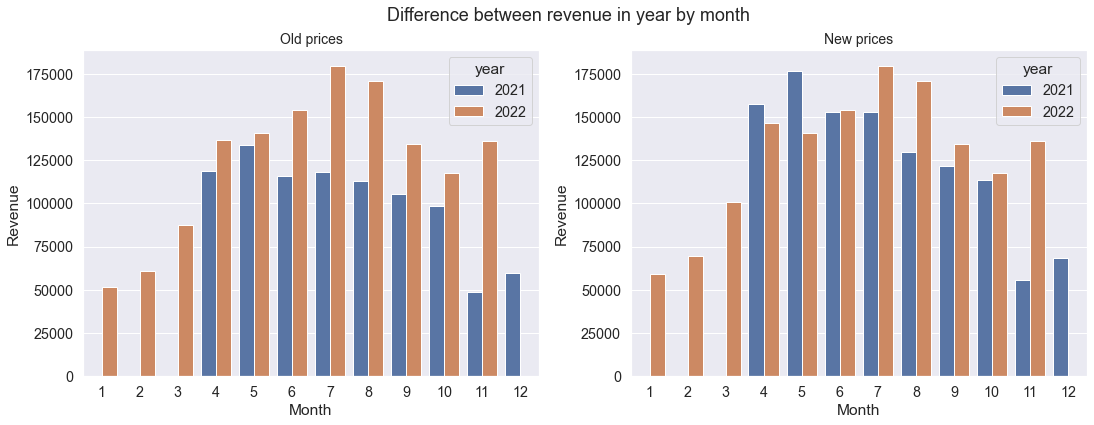

In [33]:
f, ax = plt.subplots(1, 2, figsize = (18,6))

f.suptitle('Difference between revenue in year by month', fontsize=18)

sns.barplot(x='month', y='Суммапродаж', data=df, ci=None, hue='year', ax=ax[0])
sns.barplot(x='month', y='revenue_new', data=df, ci=None, hue='year', ax=ax[1])


ax[0].set_title('Old prices', fontsize=14)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Revenue')

ax[1].set_title('New prices', fontsize=14)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Revenue')



plt.show()



Летний сезон и лето характеризуются значительным ростом выручки. В 2021 году наиболее прибыльными стали Апрель и Май, а в 2022 - Июль и Август.
Также средние выручки за 2022 год выше, чем в 2021. 


Опираясь на новые цены, в среднем, выручка весной 2021 года превышала выручку 2022 за аналогичный период.

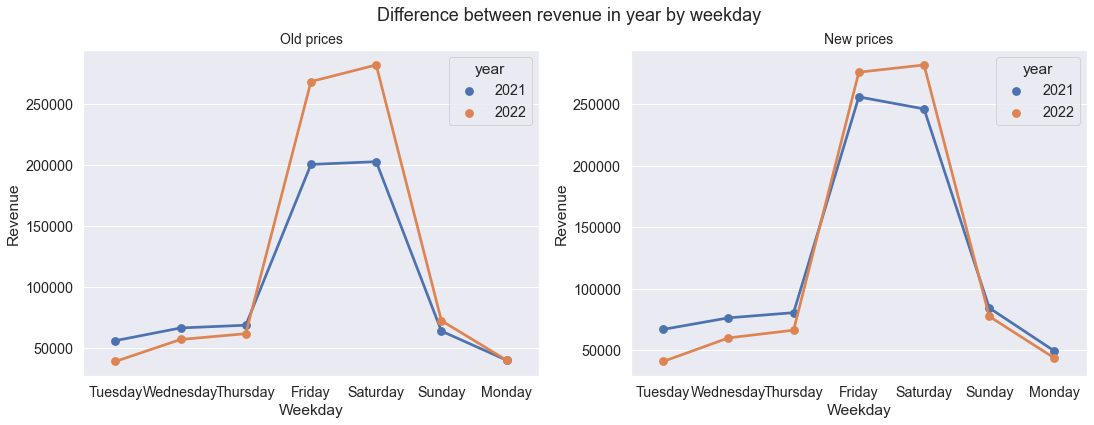

In [34]:
f, ax = plt.subplots(1, 2, figsize = (18,6))

f.suptitle('Difference between revenue in year by weekday', fontsize=18)

sns.pointplot(x='weekday', y='Суммапродаж', data=df, hue='year', ci=None, estimator=np.median, ax=ax[0])
sns.pointplot(x='weekday', y='revenue_new', data=df, hue='year', ci=None, estimator=np.median, ax=ax[1])


ax[0].set_title('Old prices', fontsize=14)
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Revenue')

ax[1].set_title('New prices', fontsize=14)
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Revenue')



plt.show()


Не учитывая выходные дни, самыми прибыльными являются Воскресенье и Четверг.


Интересное наблюдение, что средние выручки дней недели за разные года имеют похожие тенденции, но значительные различия между 2021 и 2022 годами наблюдаются только на выходных. В будние дни показатели 2022 года ниже, чем в 2021.

С учетом повышения цен, положительная динамика наблюдается только на выходных. С Воскресенья по Четверг средняя выручка стала ниже.

# Weekend

In [35]:
df.weekend = pd.to_numeric(df.weekend)

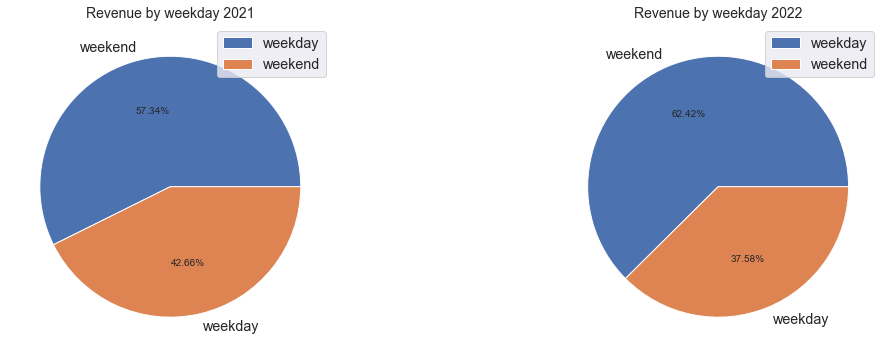

In [36]:
df_21 = df[df['year'] == 2021]
df_22 = df[df['year'] == 2022]

weekend_21 = df_21.loc[df['weekend'] == 1.0, 'Суммапродаж'].sum()
weekday_21 = df_21.loc[df['weekend'] == 0, 'Суммапродаж'].sum()

weekend_22 = df_22.loc[df['weekend'] == 1.0, 'Суммапродаж'].sum()
weekday_22 = df_22.loc[df['weekend'] == 0, 'Суммапродаж'].sum()


values_21 = [weekend_21, weekday_21]
values_22 = [weekend_22, weekday_22]
labels = ['weekend', 'weekday']


f, ax = plt.subplots(1, 2, figsize = (18,6))


wedges, texts, autotexts = ax[0].pie(values_21, labels=labels, autopct='%1.2f%%')
wedges, texts, autotexts = ax[1].pie(values_22, labels=labels, autopct='%1.2f%%')

ax[0].set_title('Revenue by weekday 2021', fontsize=14)
ax[1].set_title('Revenue by weekday 2022', fontsize=14)
ax[0].legend(['weekday', 'weekend'])
ax[1].legend(['weekday', 'weekend'])

plt.show()

62 % выручки за 2021 год пришлись на выходные дни, 38% на будни.

Распределение выручки было равномернее между выходными и будними днями в 2021 году.

# Temp Press

Посмотрим на взаимосвязь между погодными условиями и выручкой бара.

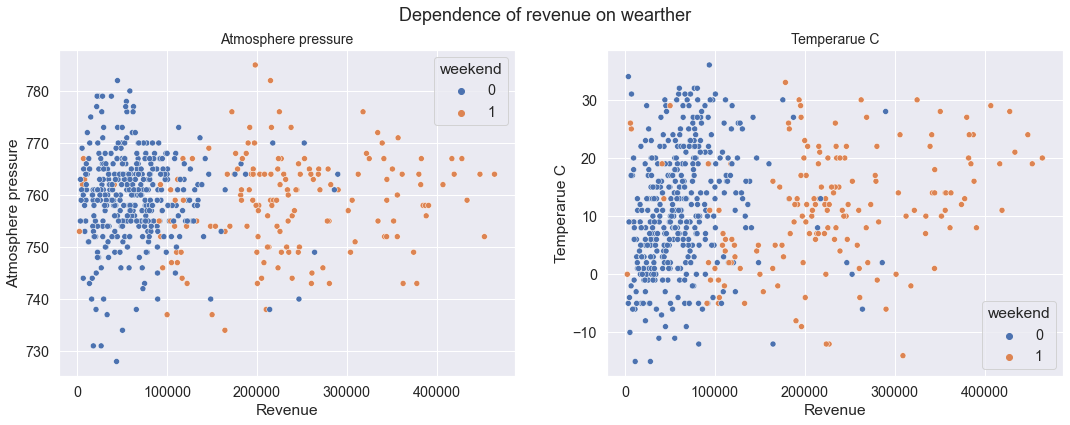

In [37]:
f, ax = plt.subplots(1, 2, figsize = (18,6))

f.suptitle('Dependence of revenue on wearther', fontsize=18)

sns.scatterplot(x='Суммапродаж', y='press', data=df, hue='weekend', ax=ax[0])
sns.scatterplot(x='Суммапродаж', y='temp', data=df, hue='weekend', ax=ax[1])


ax[0].set_title('Atmosphere pressure', fontsize=14)
ax[0].set_xlabel('Revenue')
ax[0].set_ylabel('Atmosphere pressure')

ax[1].set_title('Temperarue C', fontsize=14)
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Temperarue C')



plt.show()

In [38]:
np.corrcoef(df['temp'], df['Суммапродаж'])[1][0]

0.1520247227831077

Можно сказать, что наибольшие выручки наблюдаются при плюсовых температурах, но также ранее мы выяснили, что летнее время наиболее прибыльное, так как в Санкт-Петербурге туристический сезон.

Коэфициент корелляции довольно слабый, сложно сказать, что температура воздуха действительно влияет на покупательскую способность.

Атмосферное давление также не оказывает ощутимого влияния на покупательскую способность.

# Curs

Как менялась выручка при изменениях курса доллара по отношению к рублю

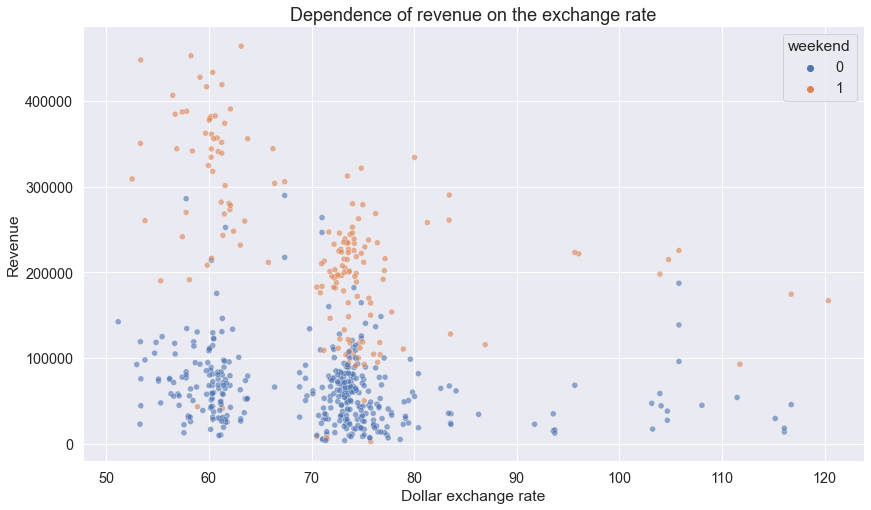

In [39]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='curs', y='Суммапродаж', data=df, hue='weekend', alpha=0.6)


plt.title('Dependence of revenue on the exchange rate', size=18)
plt.xlabel('Dollar exchange rate')
plt.ylabel('Revenue')

plt.show()

In [40]:
np.corrcoef(df['press'], df['temp'])[1][0]

0.19509716277654557

При росте курса Американского доллара по отношению к рублю, высокие выручки наблюдались реже.
Коэфициент корелляции приблизительно 0.2 - довольно низкий.

Падение выручек может быть обусловлено не только курсом доллара, но и событиями, которые вызвали рост курса: внешнеполитической обстановкой, экономически санкицями и тд.

# Workers

In [41]:
df['revenue_by_worker'] = df['Суммапродаж'] / df['workers'] 
df['revenue_by_worker'].mean()

24737.645208714184

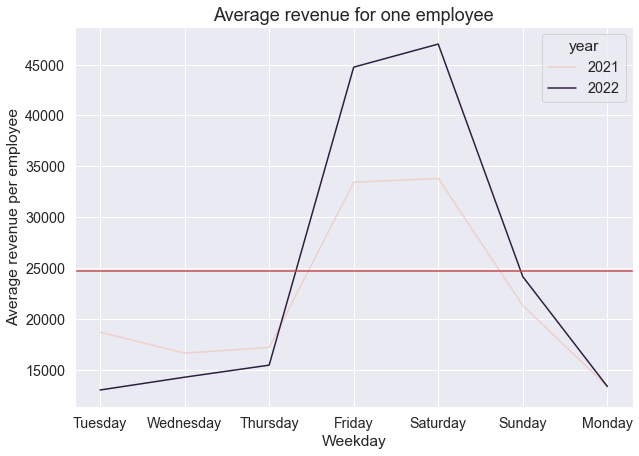

In [42]:
plt.figure(figsize=(10,7))


av_rev_by_w = df['revenue_by_worker'].mean()

g = sns.lineplot(x='weekday', y='revenue_by_worker', data=df, ci=None, estimator=np.median, hue='year')
g.axhline(av_rev_by_w, c='r')


plt.title('Average revenue for one employee', size=18)
plt.xlabel('Weekday')
plt.ylabel('Average revenue per employee')


plt.show()


In [43]:
av_rev_by_w = df['revenue_by_worker'].median()



Красная линия показывает среднюю выручку приходящуюся на одного сотрудника, кривые отражают среднюю выручку приходящуюся на сотрудника в разные недели. Таким образом можно сказать, что во Вторник и Понедельник фонд оплаты труда распределен черезмерно. В то время как в выходные дни сотрудников на смене не хватает. 

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Results</div>

 

## В ходе проведенного анализа данных, я выяснил:

 - Бар заработал на 57% больше в 2022 году, чем 2021. Но с учетом повышения цен, в среднем за день, бар стал зарабатывать на 5% больше.

- Летний сезон является наиболее прибыльным:
                 - 2021 год пиковые месяцы - Апрель, Май.
                 - 2022 год пиковые месяцы - Июль, Август.

- Самыми прибыльными днями являются выходные дни. В 2022 году бар увеличил показатели выручки за выходные дни, но выручки в остальные дни снизились вместе с показателями, в сравнении с предыдущим годом. Нужно сделать акцент на будних днях, которые составляют около 40% выручки.

- Количество наличных получаемых на буднях и на выходных - почти не изменяется по отношению к разнице общей выручки.

- Выходные дни составляют около 60% от общей выручки.

- Погодные условия не оказывают ощутимого влияния на размер получаемой выручки.

- Курс доллара оказывает влияние на количество получаемой выручки, но также это может быть обусловлено и другими факторами, которые оказывают непосредственное влияние на рост курса доллара.

- Рабочий график сотрудников требует пересмотрения из-за неравномерного распределения сил.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Recommendations</div>

 

## Какие данные стоит собирать бару и почему:

- Отдельные продажи кухни и продажи по бару, более детальные продажи по позициям.
- Себестоимость позиции.
- Количество гостей за столом.
- Время открытия и закрытия стола в программе.
- Количество бронирований столов.

Таким образом руководство сможет обладать полной картиной: 
   - какие департаменты заведения зарабатывают, 
   - какие позиции наиболее маржинальны,
   - посещаемость заведения, 
   - средний чек,
   - загруженность заведения.
      
      
